# Default of Credit Card Clients using SVM

## Before feeding the data into an SVM (Support Vector Machine) model, the following steps are typically followed:

### Steps:
1. **Data Cleaning**:
   - Remove or handle missing values and outliers. SVM models are sensitive to noisy data, so this step ensures that the model doesn’t overfit or produce unreliable predictions.

2. **Feature Scaling**:
   - Scale or normalize the features (e.g., using Standardization or Min-Max scaling). SVM models are sensitive to the scale of data, and features with larger magnitudes may dominate the decision boundary.

3. **Feature Selection**:
   - Choose relevant features and remove irrelevant ones. This reduces the dimensionality and helps in improving the model’s performance and speed.

4. **Data Transformation**:
   - Apply transformations like encoding categorical variables if needed (e.g., One-Hot Encoding for non-numeric data). SVM requires numerical input, and categorical features must be converted to numeric values.

5. **Train-Test Split**:
   - Split the data into training and testing sets to evaluate the model’s performance and avoid overfitting. This ensures that the model generalizes well to unseen data.

6. **Kernel Selection**:
   - Choose the appropriate kernel (e.g., Linear, Polynomial, RBF) based on the nature of the data. The kernel transforms data into higher-dimensional space to find a hyperplane that best separates the classes.

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
sns.set_context("poster")
# sns.set_theme(style="ticks")
sns.set_theme(style="whitegrid")
# sns.set_theme(style="darkgrid")

In [6]:
df = pd.read_excel("Data/default of credit card clients.xls",header=1)

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
df.rename(columns={"default payment next month":"default"},inplace=True)

In [10]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
df["default"].value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

In [12]:
#Drop the Id column
df.drop("ID",axis=1,inplace=True)

In [13]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Handling missing values

In [14]:
df.isna().sum().sum()

np.int64(0)

**ID**: Unique client identifier.

**LIMIT_BAL**: Credit limit on the card.

**SEX**: Gender of the client (1 = Male, 2 = Female).

**EDUCATION**: Education level (1 = Graduate school, 2 = University, 3 = High school, 4 = Others).

**MARRIAGE**: Marital status (1 = Married, 2 = Single, 3 = Others).

**AGE**: Age of the client.

**PAY_0 to PAY_6**: Payment status from the last 6 months (e.g., 0 = No consumption, 1 = Paid in full, 2 = Payment delay for 1 month, etc.).

**BILL_AMT1 to BILL_AMT6**: Bill statements for the last 6 months (indicating the bill amount).

**PAY_AMT1 to PAY_AMT6**: Amount paid in the last 6 months.

In [15]:
# one way to find missing data is to check unique values in columns 
print(df["SEX"].unique())
print(df["EDUCATION"].unique())
print(df["MARRIAGE"].unique())

[2 1]
[2 1 3 5 4 6 0]
[1 2 3 0]


so in above we find that education and marriage have 0 values which doesnot represent anything but missing values"

In [16]:
#now find total length of these values
print("missing values: ",len(df.loc[(df["EDUCATION"] == 0 ) | (df["MARRIAGE"] == 0)]))
print("dataset lenght:" ,len(df))

missing values:  68
dataset lenght: 30000


In [17]:
#now we remove these missing values 

df_no_missing=df.loc[(df["EDUCATION"] != 0 ) & (df["MARRIAGE"] != 0)]

In [18]:
len(df_no_missing)

29932

In [19]:
#now check again
print(df_no_missing["SEX"].unique())
print(df_no_missing["EDUCATION"].unique())
print(df_no_missing["MARRIAGE"].unique())

[2 1]
[2 1 3 5 4 6]
[1 2 3]


In [20]:
#Downsampling the Data ,means reduced the size of data (we do that when dealing with imbalance dataset)
# but here in our case the data size is large so we will reduce both classes 

df_no_default=df_no_missing[df_no_missing["default"] == 0]
df_default=df_no_missing[df_no_missing["default"] == 1]

In [21]:
len(df_no_default)

23301

In [22]:
len(df_default)

6631

In [23]:
df_no_default_resample = resample(
    df_no_default,
    replace=False,
    n_samples=1000,
    random_state=42

)

In [24]:
len(df_no_default_resample)

1000

In [25]:
df_default_resample = resample(
    df_default,
    replace=False,
    n_samples=1000,
    random_state=42

)
len(df_default_resample)

1000

now make new dataframe from these downsample

In [26]:
df_resample=pd.concat([df_no_default_resample,df_default_resample])

In [27]:
df_resample

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
641,130000,2,3,1,28,0,0,0,0,-2,...,0,0,0,2500,1000,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,35234,32869,33862,7200,7500,1200,1200,1500,1300,0
16004,180000,2,2,1,29,0,0,0,0,0,...,26662,26166,26176,1800,1800,1500,1056,950,1000,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,0,0,979,412,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,81778,83082,84811,3300,3331,3359,2663,2751,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,2,1,2,34,1,2,2,2,2,...,25624,25977,25413,1396,0,1967,903,0,1100,1
14072,320000,1,1,1,43,-1,0,0,0,0,...,31851,3105,-45,10000,5000,0,0,0,0,1
5387,50000,1,2,2,23,-1,-1,0,0,-1,...,11804,1420,0,15000,20300,9500,1420,0,0,1
23192,150000,2,3,1,43,0,0,0,0,0,...,22013,22449,22922,1973,1353,1366,802,833,837,1


we dont need Data Transformation (one hot encoding) since all features are int 

### Split data

In [28]:
X=df_resample.drop("default",axis=1).copy()
y=df_resample["default"].copy()

In [29]:
len(X)

2000

In [30]:
len(y)

2000

### one hot encoding
We should apply One-Hot Encoding (OHE) to `SEX`, `EDUCATION`, and `MARRIAGE` because these variables are **nominal** (no inherent order), and OHE helps the model treat them as distinct categories without assuming any ordinal relationship between them. This ensures the model doesn't incorrectly interpret the numeric values as ordered.

In [31]:
X_encoded=pd.get_dummies(
    X,columns=["SEX",
               "EDUCATION",
               "MARRIAGE",
               "PAY_0",
               "PAY_2",
               "PAY_3",
               "PAY_4",
               "PAY_5",
               "PAY_6"],dtype=int)

In [32]:
X_encoded

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,34,24022,24744,24053,25624,25977,25413,1396,0,...,0,0,0,0,1,0,0,0,0,0
14072,320000,43,18625,28143,32159,31851,3105,-45,10000,5000,...,0,0,0,1,0,0,0,0,0,0
5387,50000,23,2165,14796,20816,11804,1420,0,15000,20300,...,0,0,1,0,0,0,0,0,0,0
23192,150000,43,18308,19973,21000,22013,22449,22922,1973,1353,...,0,0,0,1,0,0,0,0,0,0


### Feature Scaling

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)

In [34]:
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

### Build svm model

In [35]:
model =SVC(random_state=42)
model.fit(X_train_scaled,y_train)

SVC(random_state=42)

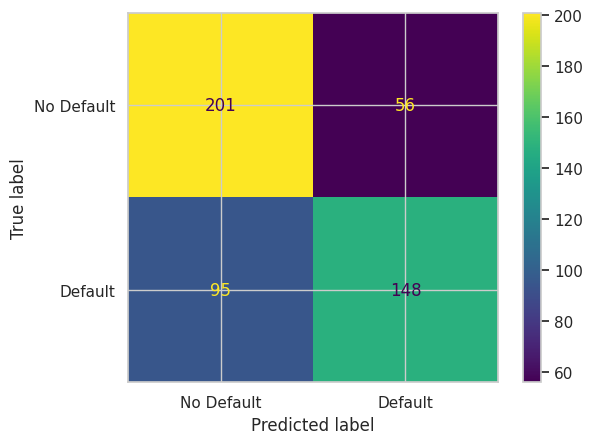

In [36]:
disp = ConfusionMatrixDisplay.from_estimator(
    model, 
    X_test_scaled, 
    y_test,
    values_format="d", 
    display_labels=["No Default", "Default"]
)
plt.show()

### Now fine tune parameters using GridSearch and CV
**Regularization (C)**: 
- Balances margin width and training errors.
- Small C: Larger margin, more errors allowed.
- Large C: Narrow margin, fewer errors.
  
**γ (gamma) for RBF (controls kernel flexibility)**

In [37]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [38]:
gcv = GridSearchCV(
    SVC(),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    verbose=2
)

In [39]:
gcv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [40]:
gcv.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [41]:
gcv.best_score_

np.float64(0.7026666666666668)

### Run svm using fine tune parameters 

In [42]:
model =SVC(C=100,gamma=0.001,random_state=42)
model.fit(X_train_scaled,y_train)

SVC(C=100, gamma=0.001, random_state=42)

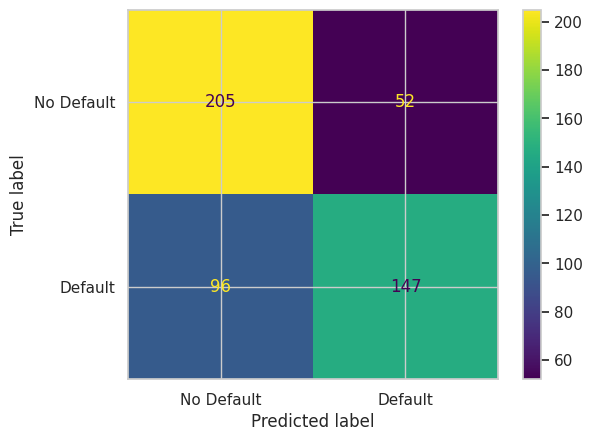

In [43]:
disp = ConfusionMatrixDisplay.from_estimator(
    model, 
    X_test_scaled, 
    y_test,
    values_format="d", 
    display_labels=["No Default", "Default"]
)
plt.show()

Using PCA to shrink 24 into 2 features (so better we can plot it and reduce dimentionality)

In [45]:
pca=PCA()
X_train_pca=pca.fit_transform(X_train_scaled)

In [46]:
X_train_pca

array([[-4.42355092e+00,  5.35308960e-01,  2.96299380e+00, ...,
         5.65124283e-15, -3.70409716e-15,  3.60682297e-15],
       [ 2.17834589e+00, -1.46743001e+00,  5.74992530e-01, ...,
         4.33194614e-16,  1.51499694e-17, -1.59734745e-15],
       [ 1.41054373e+00, -1.74943034e+00,  3.52479371e-01, ...,
        -1.21916898e-16,  2.37194574e-16, -1.34754727e-15],
       ...,
       [ 7.55857478e+00,  1.95042367e-01,  2.39451709e+00, ...,
         1.83485118e-15,  3.46074447e-15, -5.35696687e-16],
       [-3.33763518e+00,  2.78005936e-02,  9.74493406e-01, ...,
         1.02647004e-15,  3.32702327e-14,  7.51342024e-15],
       [-6.48605126e-02, -5.77758214e-01,  2.96156205e-03, ...,
         6.63309632e-15, -7.47495232e-15,  3.82192868e-15]])

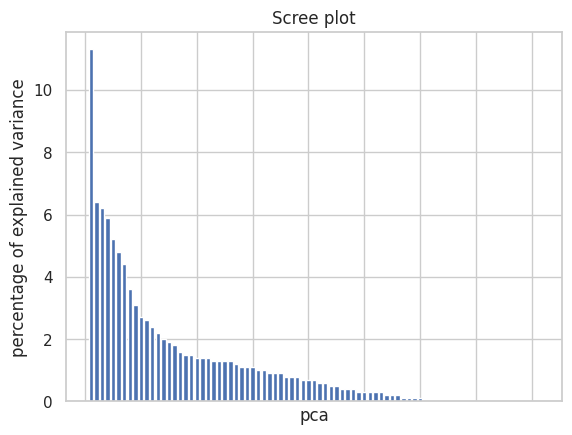

In [50]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=[str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var)

plt.tick_params(
    axis="x",
    which="both",
    bottom=False,
    top=False,
    labelbottom=False)
plt.ylabel("percentage of explained variance")
plt.xlabel("pca")
plt.title("Scree plot")
plt.show()

now run model on pc1 and pc2

In [51]:
train_pc1=X_train_pca[:,0]
train_pc2=X_train_pca[:,1]

In [78]:
#pca reduce dimension but not scale so we scale it 
pca_train_scaled=scale(np.column_stack((train_pc1,train_pc2)))
pca_train_scaled

array([[-1.47993697,  0.23720934],
       [ 0.72878434, -0.65025644],
       [ 0.47190952, -0.77521813],
       ...,
       [ 2.52878614,  0.08642835],
       [-1.11663453,  0.01231917],
       [-0.02169964, -0.25601971]])

In [90]:
#using gridsearch
param_grid = {'C': [0.1, 1, 10, 100,1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

grid_pca= GridSearchCV(
    SVC(),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    verbose=0
)

In [91]:
grid_pca

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [92]:
grid_pca.fit(pca_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [93]:
grid_pca.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}